## Calculate ROI ( Return on Investment ) for each movie
	ROI is calculated as : Profit / Budget
	Profit is calculated as : BoxOffice Collections - Budget
	Which are the top 3 movies with highest ROI across all industries?
	Which are the top 3 Hindi movies with highest ROI?
	Which are the top 3 Telugu movies with highest ROI?
	Plot all this information in separate graphs


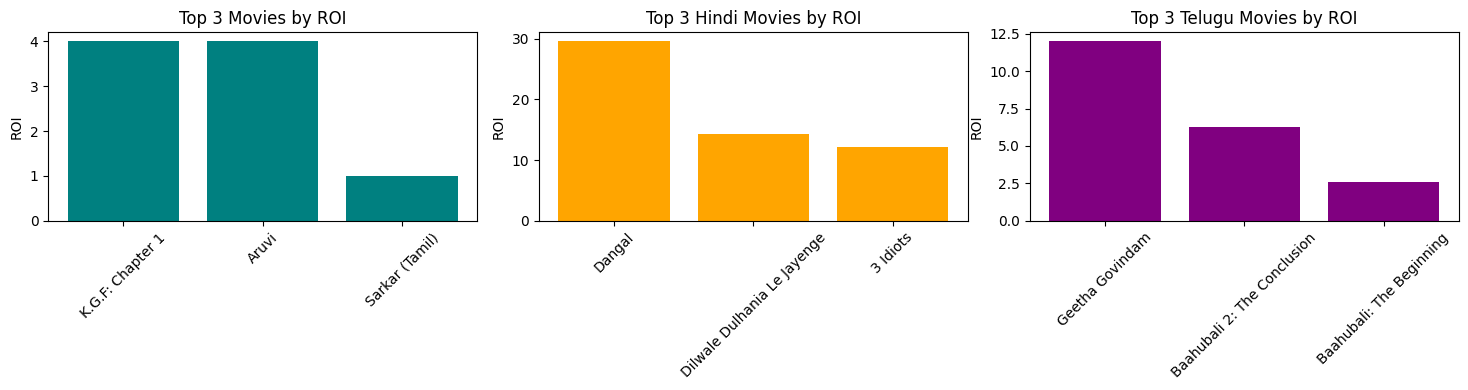

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

indian_movies = pd.read_csv('indian_movies_cleaned.csv')
bollywood = pd.read_csv('bollywood_movies_cleaned.csv')
tollywood = pd.read_csv('tollywood_movies_cleaned.csv')

def calculate_roi(df):
    df = df.copy()
    df.columns = df.columns.str.strip()
    if 'Language' in df.columns:
        df['Language'] = df['Language'].str.strip().str.lower()
    df['Profit'] = df['BoxOffice (Crores)'] - df['Budget (Crores)']
    df['ROI'] = df['Profit'] / df['Budget (Crores)']
    return df

indian_movies = calculate_roi(indian_movies)
bollywood = calculate_roi(bollywood)
tollywood = calculate_roi(tollywood)

top3_all = indian_movies.sort_values(by='ROI', ascending=False).drop_duplicates(subset='Title').head(3)
top3_hindi = bollywood.sort_values(by='ROI', ascending=False).drop_duplicates(subset='Title').head(3)
top3_telugu = tollywood.sort_values(by='ROI', ascending=False).drop_duplicates(subset='Title').head(3)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(top3_all['Title'], top3_all['ROI'], color='teal')
plt.title("Top 3 Movies by ROI")
plt.ylabel("ROI")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(top3_hindi['Title'], top3_hindi['ROI'], color='orange')
plt.title("Top 3 Hindi Movies by ROI")
plt.ylabel("ROI")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(top3_telugu['Title'], top3_telugu['ROI'], color='purple')
plt.title("Top 3 Telugu Movies by ROI")
plt.ylabel("ROI")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('Q1. ROI for all movies, hindi and telugu.png')
plt.show()
